# Logo Detection using YOLO with ResNet feature extractor#

** Main video pipeline for the Logo Detection project **

#### Imports ####

In [2]:
import sys
import numpy as np
import cv2
import utils
import matplotlib.pyplot as plt
from train_model_ import ResNet50
import time
from moviepy.editor import VideoFileClip
from PIL import Image
%matplotlib inline

Using TensorFlow backend.


### Create & Load Model ###

In [6]:
%time model = ResNet50(include_top=False, load_weight=True, weights='models/run01_logos0.01_weights.15-27.29.hdf5', input_shape=(224,224,3))

Wall time: 3.46 s


#### Image Processing Pipeline: ####

In [7]:
def process_img(img):
    dims = (img.shape[1], img.shape[0])
    print(dims)
    img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    img_float = cv2.resize(img_bgr, (224,224)).astype(np.float32)
    img_float -= 128
    img_in = np.expand_dims(img_float, axis=0)
    
    pred = model.predict(img_in)
    
    bboxes = utils.get_boxes(pred[0], cutoff=0.2, dims=dims)
    print(bboxes)
    bboxes = utils.nonmax_suppression(bboxes, iou_cutoff = 0.05)
    print(bboxes)
    draw = utils.draw_boxes(img, bboxes, color=(0, 255, 0), thick=5, draw_dot=False, radius=3)
    draw = draw.astype(np.uint8)
    
    return draw

(1920, 1200)
[]
[]


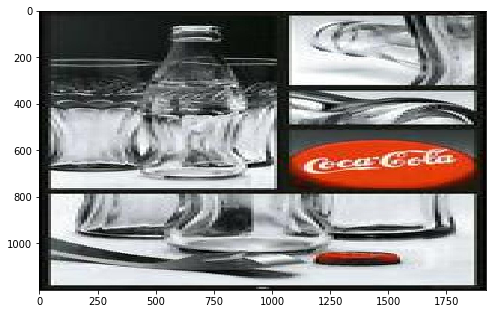

In [8]:
### Test pipeline on image from dataset itself
img_name = 'cleaned_imgs_v4/000001.jpg'
img = cv2.imread(img_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(process_img(img))

(1920, 1200)
[]
[]


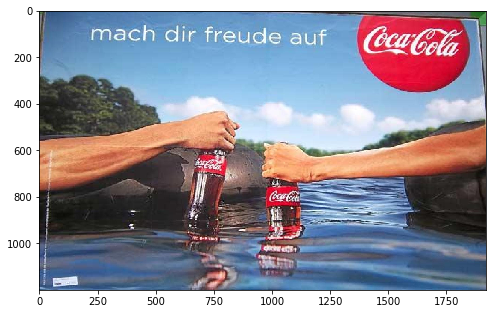

In [9]:
### Test pipeline on image the network has never seen before
img = cv2.imread('image_400.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(process_img(img))

#### Apply to video: ####

In [10]:
video1 = 'sample.mp4'
video1_output = 'sample_out.mp4'
clip1 = VideoFileClip(video1)
imgs = clip1.fl_image(process_img)
%time imgs.write_videofile(video1_output, audio=False)

OSError: MoviePy error: the file sample.mp4 could not be found!
Please check that you entered the correct path.